# 최적화 문제

## 1. Gradient And Hessian

#####(1) 위 두 함수에 대하여,$x_1=10, x_2=10$일 때의 gradient와 hessian을 **analytical하게** 구해보시오.

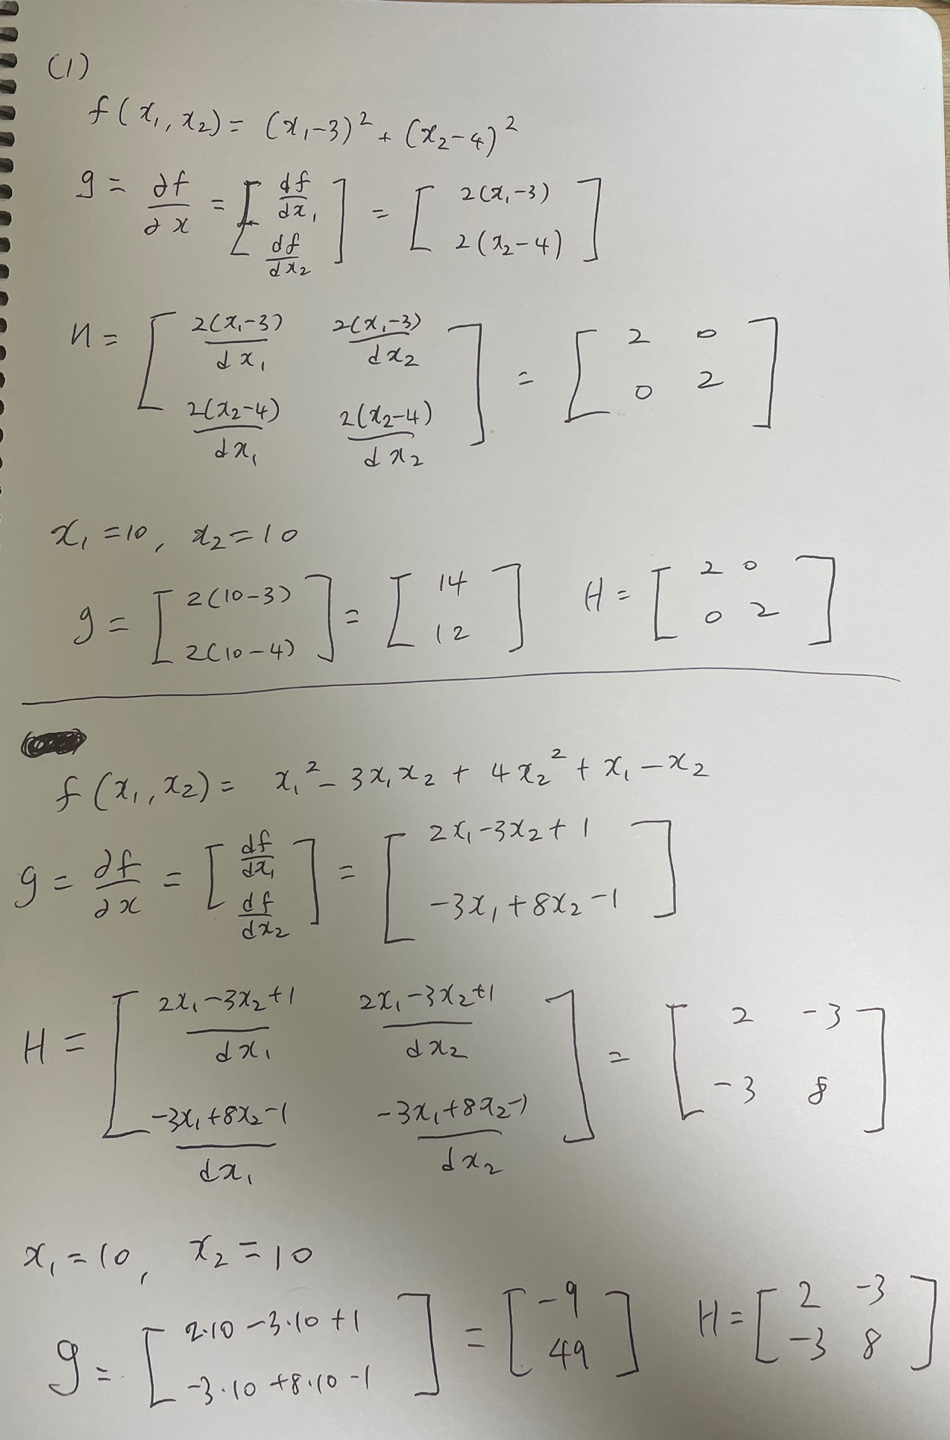**(그림 첨부)**

#####(2) 위 두 함수에 대하여 $x_1=10, x_2=10$일 때의 gradient와 hessian을 **numerical하게** 구하시오.

In [ ]:
import numpy as np
import matplotlib.pylab as plt

In [ ]:
##################################################
#            Function1, 2 코드 작성              #
##################################################
def function_1(x):
  return (x[0]-3)**2 + (x[1]-4)**2

In [ ]:
def function_2(x):
  return x[0]**2 -3*x[0]*x[1] + 4*x[1]**2 + x[0]-x[1]
##################################################
#                 코드 작성 끝                   #
##################################################

In [ ]:
def numerical_diff(f, x):
    h = 1e-5 # 0.00001
    return (f(x + h) - f(x)) / h

In [ ]:
def numerical_gradient(f, x):
    ##################################################
    #         Numerical Gradient 코드 작성           #
    ##################################################
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)
        x[idx] = tmp_val + h
        f_x_plus_h = f(x)

        # f(x)
        x[idx] = tmp_val
        fx = f(x)
        grad[idx] = (f_x_plus_h - fx) / h
        x[idx] = tmp_val

    ##################################################
    #                 코드 작성 끝                   #
    ##################################################
    return grad

In [ ]:
def numerical_hessian(f, x):
    ##################################################
    #          Numerical Hessian 코드 작성           #
    ##################################################
    h = 1e-5 # 0.0001
    hessian = np.zeros_like((x, x))
    x_n = x.copy();

    # The partial differential of function f with respect to x_idx
    for idx in range(x.size):
      x_n[idx] = x[idx] + h
      # df(x+h)
      df_x_plus_h = numerical_gradient(f,x_n)

      # df(x)
      df_x = numerical_gradient(f,x)
      hessian[:, idx] = (df_x_plus_h - df_x) / h
      x_n = x.copy();
    ##################################################
    #                 코드 작성 끝                   #
    ##################################################
    return hessian

In [ ]:
##################################################
#                Fill your code                  #
##################################################
# gradient of function1
print(numerical_gradient(function_1, np.array([10.0,10.0])))

[14.0001 12.0001]


In [ ]:
# gradient of function2
print(numerical_gradient(function_2, np.array([10.0,10.0])))

[-8.9999 49.0004]


In [ ]:
# hessian of function1
print(numerical_hessian(function_1, np.array([10.0,10.0])))

[[1.99999306 0.        ]
 [0.         2.00000727]]


In [ ]:
# hessian of function2
print(numerical_hessian(function_2, np.array([10.0,10.0])))
##################################################
#                 코드 작성 끝                   #
##################################################

[[ 2.00000727 -3.00002512]
 [-3.00002512  8.00002908]]


## 2. Gradient Descent Rule#1

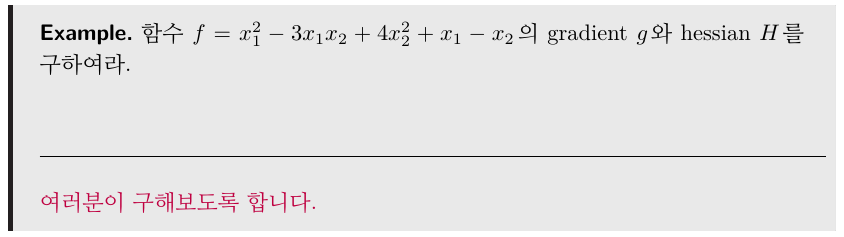

#####(1) 위 함수를 gradient descent rule를 통해, 함수 값을 가장 작게 만드는 $x^*$를 numerical하게 구하시오.

In [ ]:
##################################################
#              Function 코드 작성                #
##################################################
def function_2(x):
  return x[0]**2 -3*x[0]*x[1] + 4*x[1]**2 + x[0]-x[1]
##################################################
#                 코드 작성 끝                   #
##################################################

In [ ]:
def gradient_descent(f, x_0, eta, max_iter):
    ##################################################
    #       Gradient Descent Rule 코드 작성          #
    ##################################################
    x_k = x_0

    for k in range(max_iter):
      g_k = numerical_gradient(f,x_k)
      partial_x_k = -g_k
      x_k = x_k + eta * partial_x_k

    ##################################################
    #                 코드 작성 끝                   #
    ##################################################
    return x_k

In [ ]:
x_0 = np.array([5.0, 5.0])
eta = 0.01
max_iter=1500
##################################################
#    gradient_descent 함수 실행 코드 작성        #
##################################################
x_opt = gradient_descent(function_2, x_0=x_0, eta= eta, max_iter=max_iter)
##################################################
#                 코드 작성 끝                   #
##################################################
print(x_opt)

[-0.71449673 -0.14298335]


#####(2) Gradient descent rule를 통해 업데이트되는 $x$가 최적해를 찾아가는 경로를 플롯하시오.

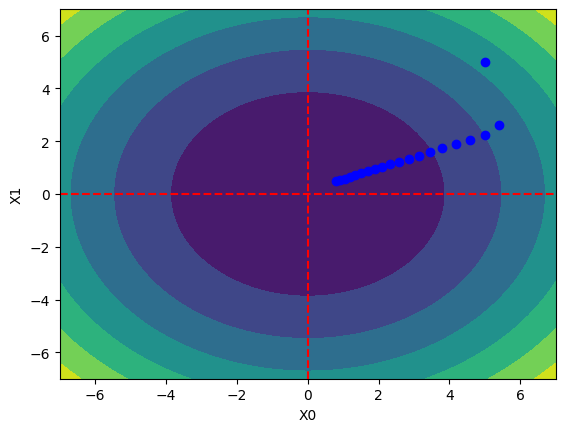

In [ ]:
eta = 0.1
max_iter = 20
##################################################
# History를 저장하는 _gradient_descent 함수 작성 #
##################################################
def _gradient_descent(f, x_0, eta, max_iter):
    x =x_0
    x_history = []

    for k in range(max_iter):
      x_history.append(x.copy())

      g = numerical_gradient(f,x)
      x = x- eta*g

    return x, np.array(x_history)
##################################################
#                 코드 작성 끝                   #
##################################################

x_0 = np.array([5.0, 5.0])
##################################################
#  _gradient_descent 함수를 사용한 최적해 구하기 #
##################################################

x, x_history = _gradient_descent(function_2, x_0, eta=eta, max_iter=max_iter)
##################################################
#                 코드 작성 끝                   #
##################################################

plt.plot( [-7, 7], [0,0], '--r')
plt.plot( [0,0], [-7, 7], '--r')
plt.plot(x_history[:,0], x_history[:,1], 'bo')

# https://www.geeksforgeeks.org/contour-plot-using-matplotlib-python/
feature_x = np.linspace(-7.0, 7.0, 100)
feature_y = np.linspace(-7.0, 7.0, 100)

# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)

Z = X ** 2 + Y ** 2

# plots filled contour plot
plt.contourf(X, Y, Z)

plt.xlim(-7.0, 7.0)
plt.ylim(-7.0, 7.0)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

## 3. Gradient Descent Rule#2

아래 그림과 같이 건물에 불이 나, 소방관들이 출동하였다.

출동한 소방차는 A 지점에 배치하였고, 건물에 진입하기 위해 사다리를 펼쳤다.

펼친 사다리는 C에 있는 지지대(전봇대)를 거쳐 건물 벽 D에 도달하였다.

* $x$ : 지지대(C)와 사다리가 시작하는 지점(A)의 거리.

* $p$ : 건물(O)과 지지대(C) 사이의 거리.

* $q$ : 지지대(C)와 사다리(B) 사이의 높이.

* $l$ : 사다리가 시작하는 지점(A)와 건물(D) 사이의 사다리 길이.

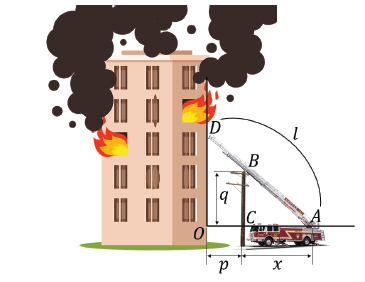

#####(1) $x, p, q$를 사용하여 사다리의 길이 $l$을 표현하는 수식을 쓰시오.



(그림 첨부)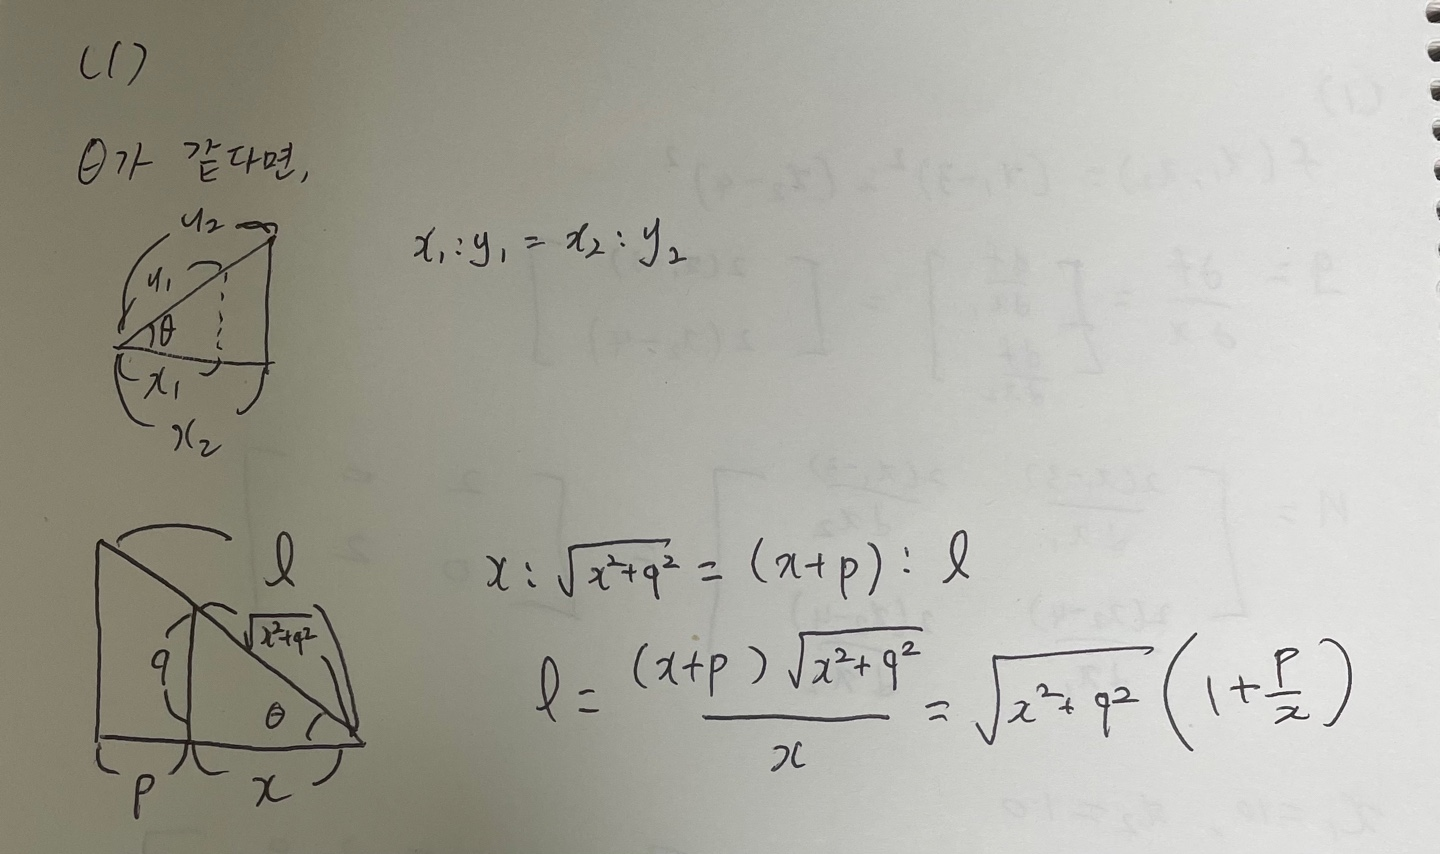

#####(2) (1)에서 쓴 수식을 사용하여, $l$을 가장 작게 만드는 $x$를 analytical하게 구하시오.



(그림 첨부)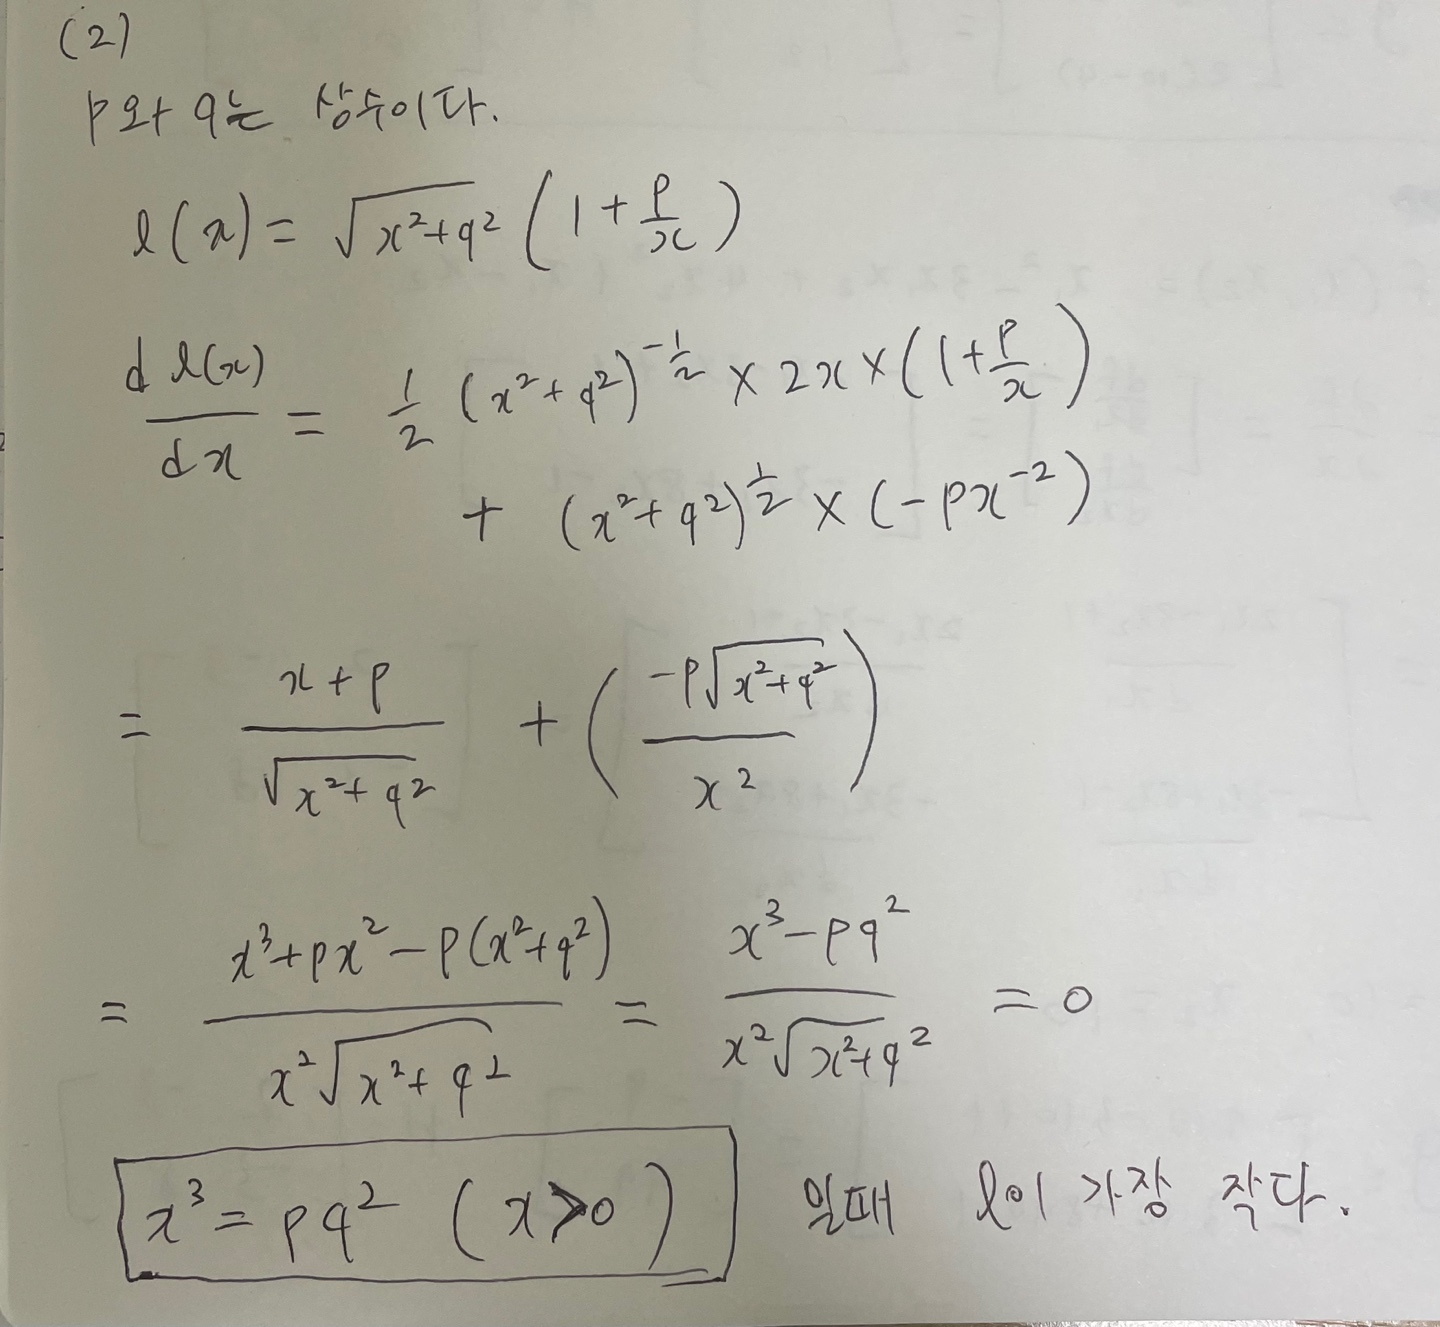

#####(3) $p=1.5^3, q=2^3$ 이라고 할 때, 사다리의 길이 $l$를 가장 짧게 만드는 $x$를 analytical하게 구하시오.

(그림 첨부)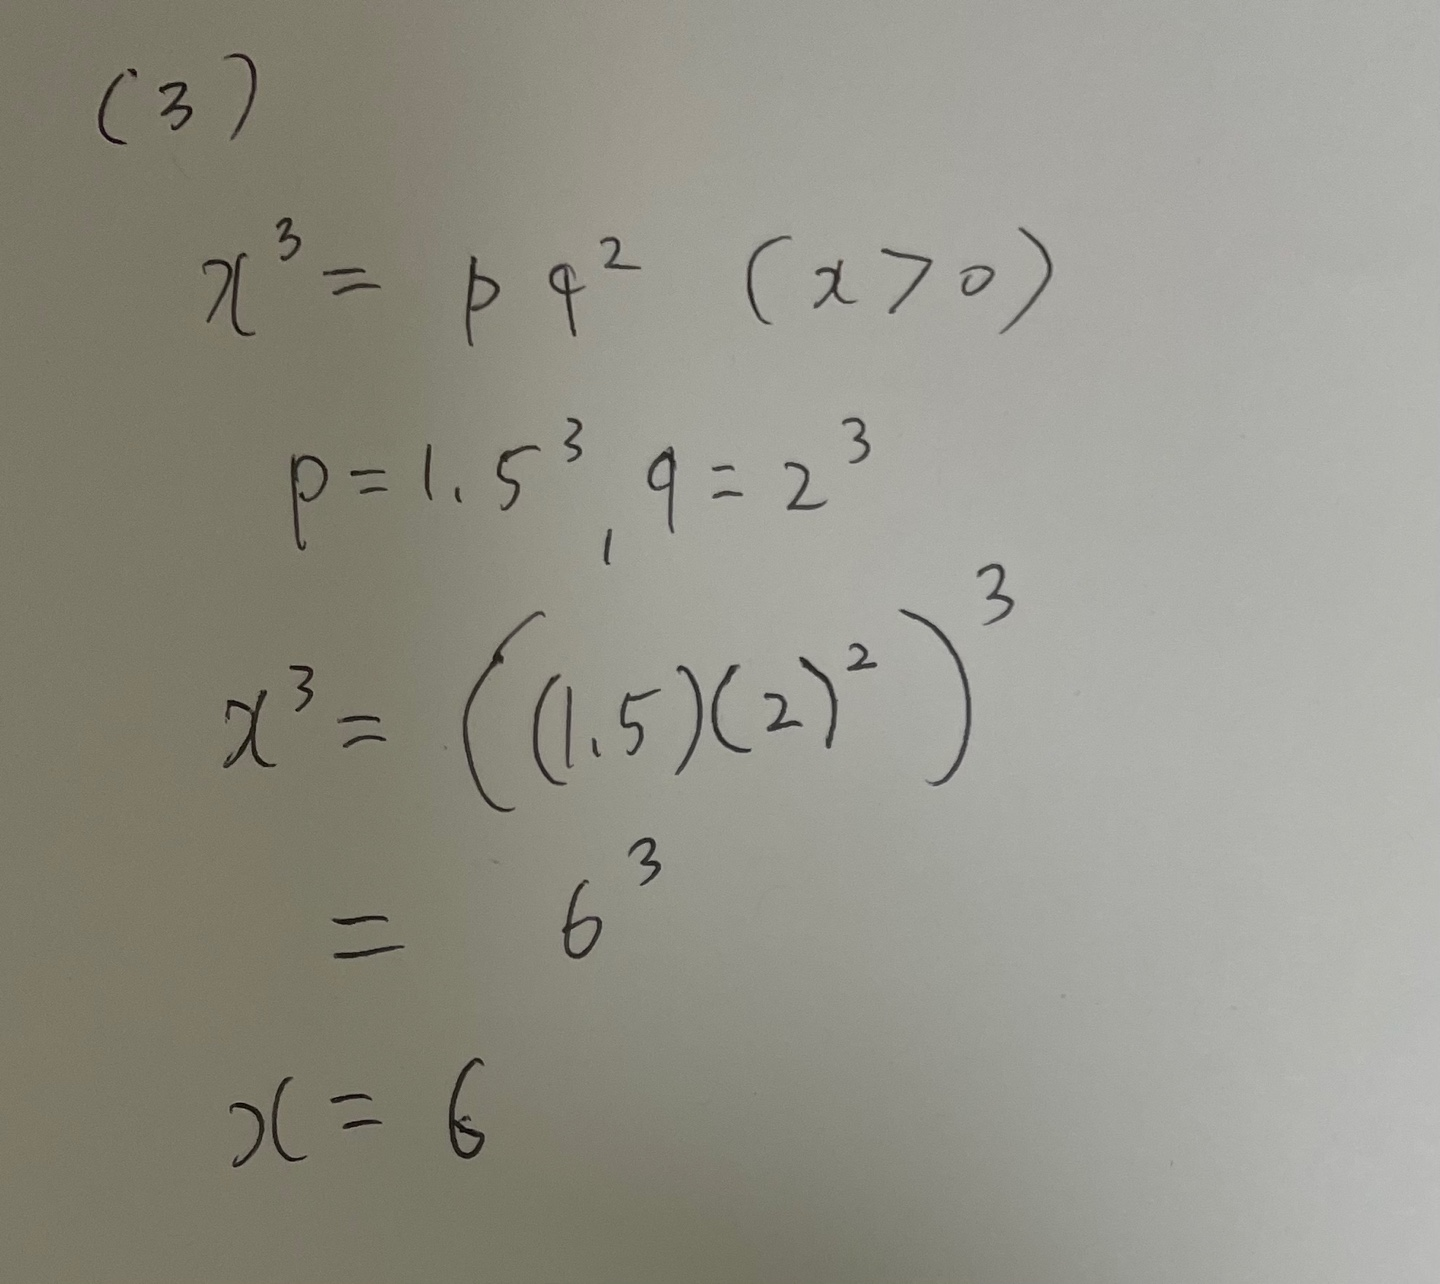

#####(4) $p=1.5^3, q=2^3$ 이라고 할 때, gradient descent rule을 사용해 $l$를 가장 짧게 만드는 $x$의 최적해를 구하고자 한다. Gradient descent rule이 2번 업데이트 하는 과정을 analytical하게 쓰시오.(소수점 아래 3자리)(초기값 : 10, step size : 0.1)

(그림 첨부)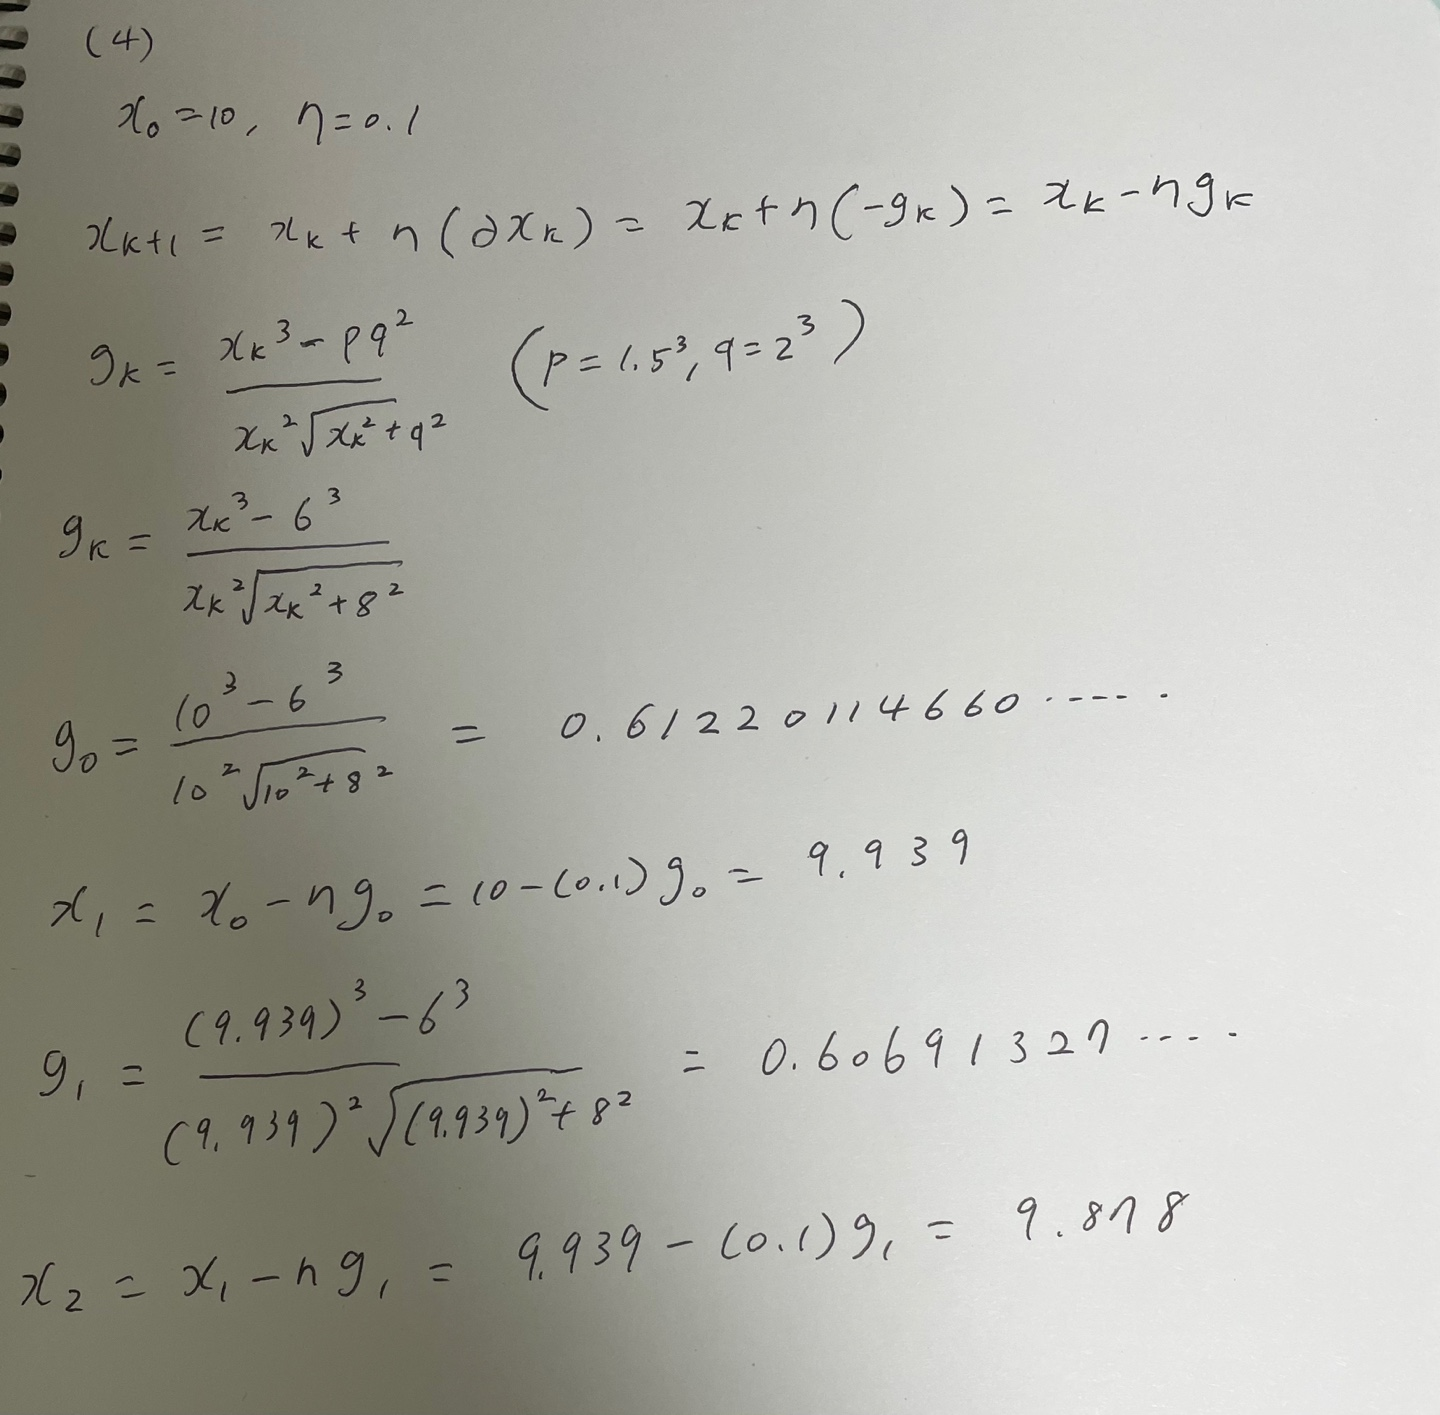

#####(5) $p=1.5^3, q=2^3$ 이라고 할 때, (1)에서 구한 식을 사용하여, 사다리의 길이 $l$를 가장 짧게 만드는 $x$를 gradient descent rule을 사용해 numerical하게 구하시오.

In [ ]:
##################################################
#              Function 코드 작성                #
##################################################
def function_3(x):
  return np.sqrt(x**2 + 8**2)*(1+(1.5**3)/x)
##################################################
#                 코드 작성 끝                   #
##################################################

In [ ]:
def gradient_descent(f, x_0, eta, max_iter):
    ##################################################
    #       Gradient Descent Rule 코드 작성          #
    ##################################################
    x_k = x_0

    for k in range(max_iter):
      g_k = numerical_gradient(f,x_k)
      partial_x_k = -g_k
      x_k = x_k + eta*partial_x_k

    ##################################################
    #                 코드 작성 끝                   #
    ##################################################
    return x_k

In [ ]:
x_0 = np.array([5.0])
eta = 0.01
max_iter = 5000
##################################################
#    gradient_descent 함수 실행 코드 작성        #
##################################################
x_opt = gradient_descent(function_3, x_0=x_0, eta=eta, max_iter=max_iter)
##################################################
#                 코드 작성 끝                   #
##################################################
print(x_opt)

[5.99994976]
